<a href="https://colab.research.google.com/github/Archandra12/Deeplearning-Project/blob/codes/525DEFCON_WIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="180" /></center>




### Table of Content

1. [Problem Statement - Predict DEFCON (Defense Readiness Condition)](#section1)<br>
2. [The DEFCON Dataset](#section2)<br>
  - 2.1 [Get the Data](#section201)<br>
  - 2.2 [Clean the Data](#section202)<br>
  - 2.3 [Split the Data into Train and Test](#section203)<br>
  - 2.4 [Inspect the Data](#section204)<br>
  - 2.5 [Split Features from Labels](#section205)<br>
  - 2.6 [Normalize the Data](#section206)<br>
3. [The Model](#section3)<br>
  - 3.1 [Build the Model](#section301)<br>
  - 3.2 [Inspect the Model](#section302)<br>
  - 3.3 [Train the Model](#section303)<br>
  - 3.4 [Make Predictions](#section304)<br>
4. [Model Tuning](#section4)<br>
  - 4.1 [Increasing the Number of Hidden Layers and Hidden Units](#section401)<br>
  - 4.2 [Weight Regularization](#section402)<br>
  - 4.3 [Dropout](#section403)<br>
  - 4.4 [Combined L2 + Dropout](#section404)<br>
  - 4.5 [Batch Normalization](#section405)<br>
5. [Conclusion](#section5)<br>

<a id=section1></a>
## 1. Predict DEFCON (Defense Readiness Condition)

Military conflict is an intense state of violence. In such situations, it is crucial for a nation to stay alert, cope with it, and mitigate its
implications. The DEFCON system allows the nation’s forces to be a step ahead of its rivals
A country has set up the DEFCON (Defense Readiness Condition) warning system. Defense readiness conditions (DEFCONs) describe progressive alert postures primarily for use between the Joint Chiefs of Staff and the commanders of unified commands.
DEFCONs are graduated to match situations of varying military severity. DEFCONs are phased increases in combat readiness.
It consists of five levels of readiness for the military forces to be prepared for the consequences of the conflict. In general terms, these are descriptions of DEFCONs:
- DEFCON 5 Normal peacetime readiness
- DEFCON 4 Normal, increased intelligence and - strengthened security measures
- DEFCON 3 Increase in force readiness above normal readiness
- DEFCON 2 Further Increase in force readiness, but less than maximum readiness
- DEFCON 1 Maximum force readiness.
####__Objective__
As part of this excercise we will use Deep learning to train our models on dataset which has all necessary features to predict the DEFCON level required at a particular instance. We will analyse the data, train models, test their accuracies, verify their predictions. Main objective of this would be to use all the concepts required for ensuring the model predicts with best accuracy as DEFCON a mission critical task.

We will use the [DEFCON](https://github.com/Archandra12/Deeplearning-Project/blob/data/defcon_level.csv) Dataset and build a model to predict the DEFCON level for a given situation.



<center><img src="https://github.com/Archandra12/Deeplearning-Project/blob/images/DEFCON.jpg" width="340" height="80" /></center>

The DEFCON Dataset - Description

| Column                     |Description        |
| ---------------------------|--------------------------|		
|Allied_Nations|:The number of nations that have joined together as allies.|
|Diplomatic_Meetings_Set|:The number of meetings with the intent to resolve the conflict that is planned.|
|Percent_Of_Forces_Mobilized |:The percentage of forces mobilized.|
|Hostile_Nations |:The number of enemy nations that have allied together.|
|Active_Threats|:The number of situations or threats that require immediate attention.|
|Inactive_Threats|:The number of situations or threats being monitored for activity or escalation.|
|Citizen_Fear_Index|:The percentage of citizens who fear catastrophic military conflicts.|
|Closest_Threat_Distance(km) |:The closest threat to the border of the country in question.|
|Aircraft_Carriers_Responding|:The number of aircraft carriers actively traveling towards a threat to neutralize it.||
|Troops_Mobilized(thousands)|:The number of troops that are activated and responding to the threats being the most.|
|DEFCON_Level |:A numeric scale of conflict 'seriousness' with 1 being the least serious and 5 being the most. (**target variable**)|
|ID|:An ID to aid a checker script.|


<a id=section2></a>
## 2. Exploratory Data Analysis

<a id=section201></a>
### 2.1 Setup the environment

In [1]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-c4rdn9nr
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-c4rdn9nr
     |████████████████████████████████| 1.0MB 8.5MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0d16e549c837c7a268c9e8d866e886164aac86d2d_-cp37-none-any.whl size=151486 sha256=afac8050a03f7304c029a89fed285175f27eaf34c8bbf9a3b5063880e55192e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-8oqmg39_/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [2]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 6.3MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=166f600d1cc302b79b1008b088e57f1385b65b23a96acc8783639b3330046b92
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=103941daf58658eaccdacdb48716e35c809d98999a3a44dab31f74bd64ae2b9e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
#importing common libraries
import pathlib
import numpy as np
import pandas as pd
#libraries for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import tensorflow
import tensorflow as tf
#import kerastuner, will be used for hyperparameter tuning
import kerastuner as kt
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
#lets check the version of tensorflow nd keras tuner
print(tf.__version__)
print(kt.__version__)
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU
from kerastuner.engine.hyperparameters import HyperParameters
from keras.callbacks import EarlyStopping, TensorBoard

2.4.1
1.0.2


- Some useful functions

In [4]:
#Function to plot Model accuracies
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    #plt.figure(1)
    for l in loss_list:
        ax1.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        ax1.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    ax1.set_title('Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ## Accuracy
    #plt.figure(2)
    for l in acc_list:
        ax2.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        ax2.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    plt.show()

In [5]:
#Funcion to plot confusion matrix for the model prediction
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

<a id=section202></a>
### 2.2 Get the Data

- Load data using Pandas Dataframe

In [6]:
dataset_path = 'https://raw.githubusercontent.com/Archandra12/Deeplearning-Project/data/defcon_level.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


- We have a multiclass target variable [DEFCON Level] in our dataset

<a id=section202></a>
### 2.2 Inspect the Data



- Checking Datatype of each column of data

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                10000 non-null  int64  
 1   Diplomatic_Meetings_Set       10000 non-null  int64  
 2   Percent_Of_Forces_Mobilized   10000 non-null  float64
 3   Hostile_Nations               10000 non-null  int64  
 4   Active_Threats                10000 non-null  float64
 5   Inactive_Threats              10000 non-null  float64
 6   Citizen_Fear_Index            10000 non-null  float64
 7   Closest_Threat_Distance(km)   10000 non-null  float64
 8   Aircraft_Carriers_Responding  10000 non-null  int64  
 9   Troops_Mobilized(thousands)   10000 non-null  float64
 10  DEFCON_Level                  10000 non-null  int64  
 11  ID                            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


__Obseration:__ All data columns are numerical and there are no null values. Let's also check if there are columns with zero values

In [8]:
(dataset == 0).sum(axis=0)/100

Allied_Nations                   0.00
Diplomatic_Meetings_Set         47.63
Percent_Of_Forces_Mobilized      8.98
Hostile_Nations                  0.00
Active_Threats                   0.00
Inactive_Threats                 0.00
Citizen_Fear_Index               0.07
Closest_Threat_Distance(km)      0.00
Aircraft_Carriers_Responding    11.44
Troops_Mobilized(thousands)      0.00
DEFCON_Level                     0.00
ID                               0.00
dtype: float64

__Observation:__ as we can see Diplomatic_Meetings_Set has 47.63% zeros we are ok with that.

- Checking data distribution in each column

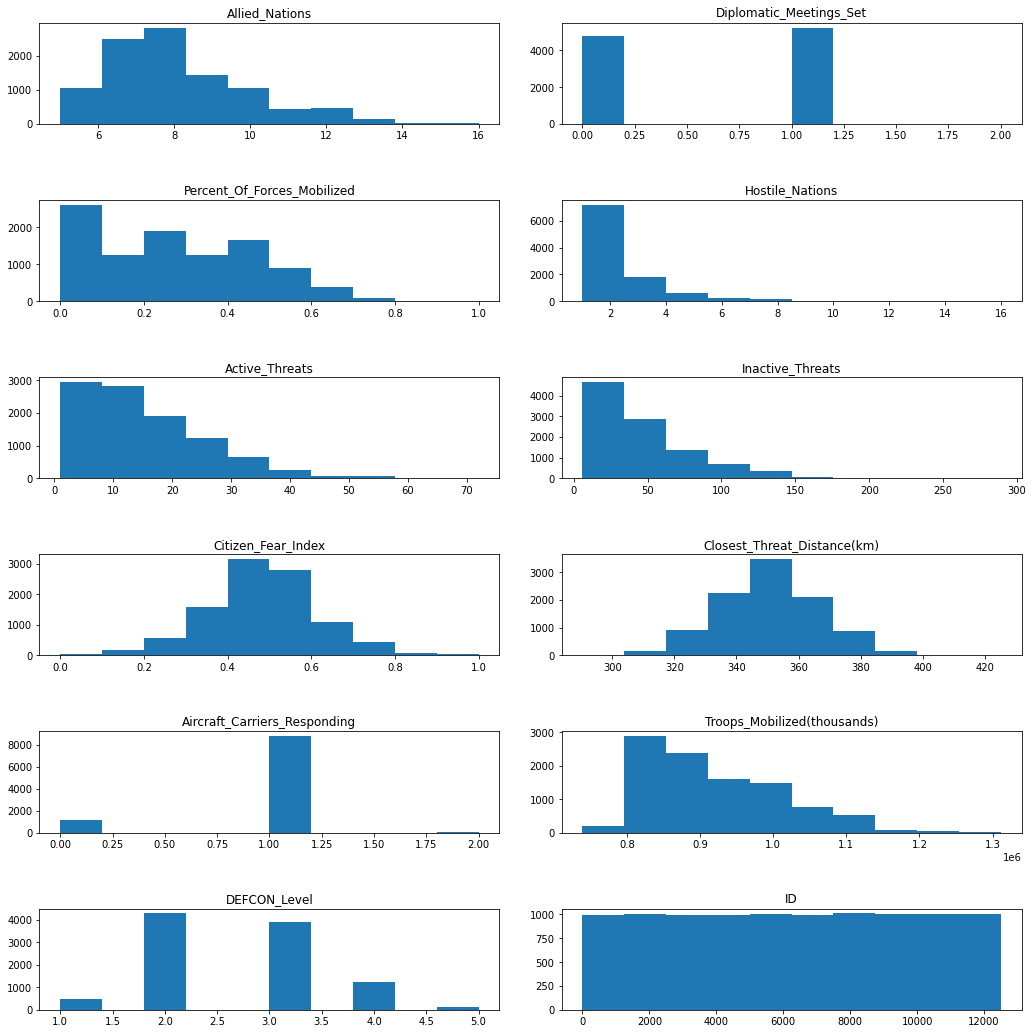

In [9]:
ig, axis = plt.subplots(6, 2, figsize=(15,15)) 
for i, column in enumerate(dataset.columns):
  axis[i//2, i%2].hist(dataset[column])
  axis[i//2, i%2].set_title(column)
ig.tight_layout(pad=3.0)  
  #print(i//2, i%2, column)

__Observation:__
- Data in all the columns have different scales
- ID column is a record identifier 
- Target variable DEFCON Level has maximum data for values 2 and 3. Percentage of records for level 1, 4 and 5 are less and this indicates data imbalance
- Aircraft carriers responding indicates most of the recors have values betwen 1 and 1.25
- Citizen fear index and Closest threats seem to spread normal but also indicate some correlation between them.
- Allied Nations, Percentage of forces mobilized, Active threats, Inactive threats and Troops(Mobilized) have right scewed data 

- Checking Unique values in ID column

In [10]:
dataset.ID.nunique()

10000

__Observation:__ ID column has unique values and we can drop it.

In [11]:
dataset.drop(['ID'], axis=1, inplace=True)

- As our target column is multiple class let's see the overall data distribution for DEFCON level

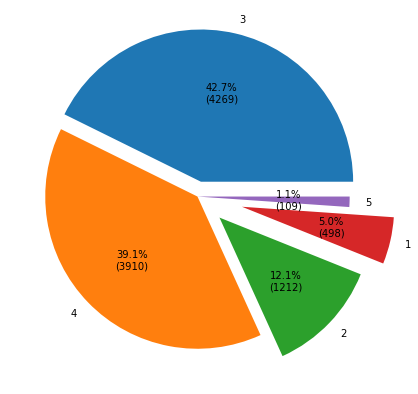

In [12]:
#dataset['DEFCON_Level'].value_counts().plot(kind='pie')
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
ig = plt.figure(figsize =(10, 7))    
data = dataset['DEFCON_Level'].value_counts()
explode = (0.1, 0.0, 0.2, 0.3, 0.0)
plt.pie(data, labels=dataset['DEFCON_Level'].unique(), autopct = lambda pct: func(pct, data), explode=explode)
plt.show()

__Observation:__ We can see that we have just above 1% of records for DEFCON level5 and 5% records for DEFCON level1. We must use Data sampling techniques to make our data balanced. Alternatively, we will pass different class weights to models. 

- Draw heatmap on the dataset

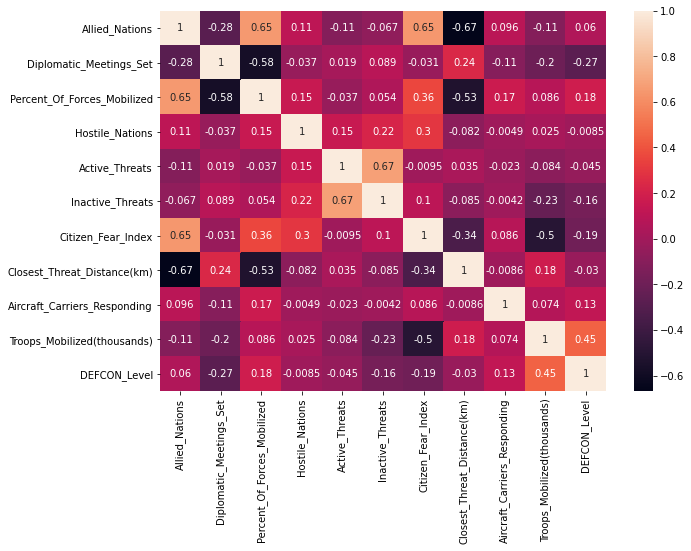

In [13]:
# plotting the heatmap

fig= plt.figure(figsize=(10,7))
hm = sns.heatmap(data = dataset.corr(), annot=True)
  
# displaying the plotted heatmap
plt.show()

Observation: 
- Hostile Nations seem to have no impact on DEFCON Level
- Aircraft_Carrers_Responding has low corelation with amost all features
- Active_Threats and Inactive_Threats have strong correlation
- Percentage_of_forced_Mobilized has negative correlation with Dipomatic_Meetings_Set
- Citizen_Fear_Index and Allied_Nations have strong positive correlation

- Let's check feature importance so that we can decide which all features we will take forward for our modelling

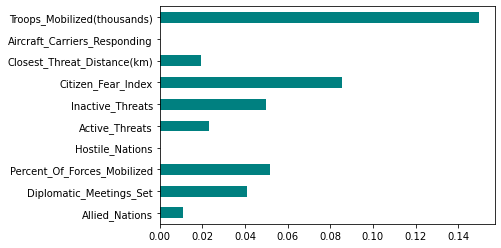

In [14]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(dataset.iloc[:, dataset.columns!='DEFCON_Level'],dataset['DEFCON_Level'])
feat_importance= pd.Series(importances, dataset.columns[0:len(dataset.columns)-1])
feat_importance.plot(kind='barh',color='teal')
plt.show()

__Observation:__ Most important feature is Troop_Mobilized(thousands) that too has 16% probability to influence the DEFCON level.

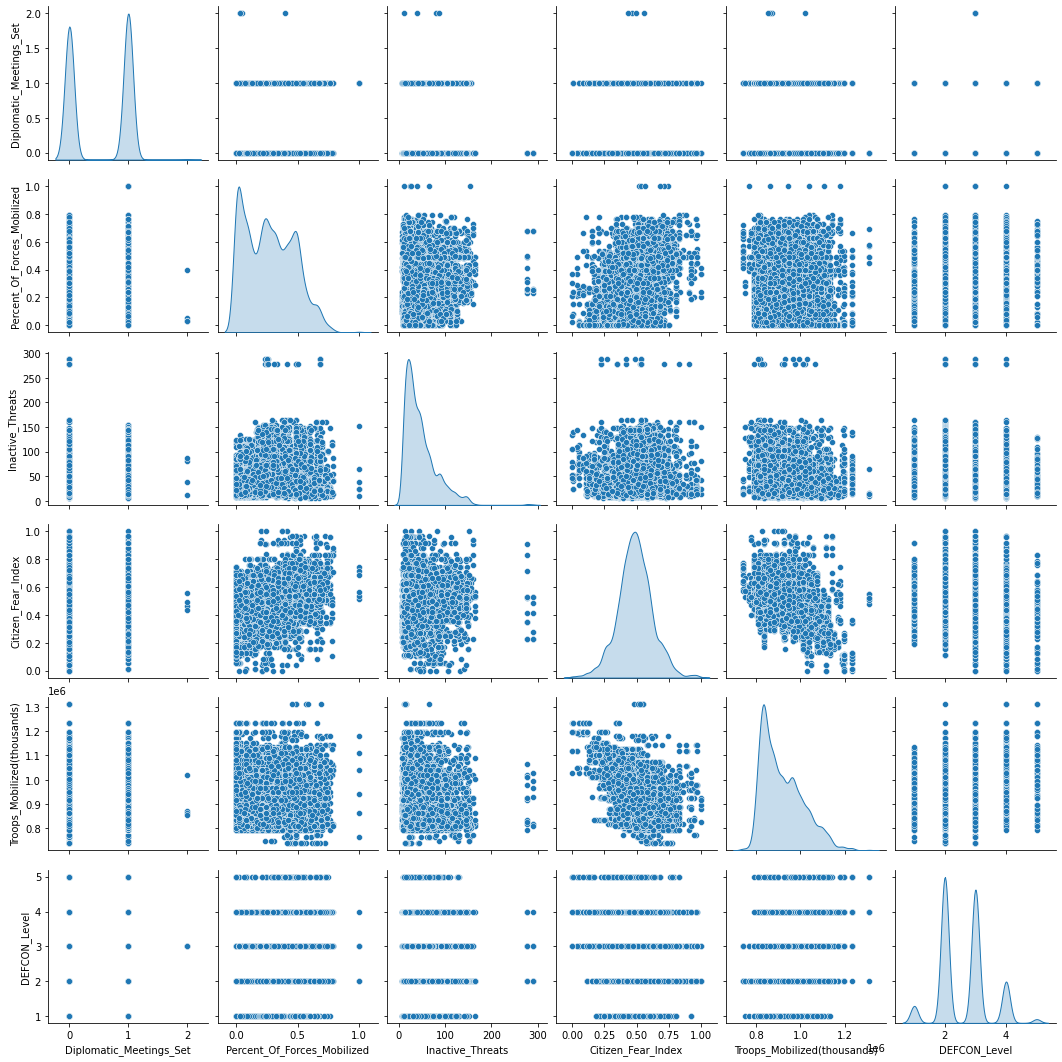

In [15]:
sns.pairplot(dataset[['Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Inactive_Threats', 'Citizen_Fear_Index', 'Troops_Mobilized(thousands)', 'DEFCON_Level']], diag_kind="kde")

- Troops_Mobilized and Citizen_fear_index show slight correlation other features don't show any correlations

<a id=section203></a>
### 2.3 Split the Data into Train, Val, Test
- Let's take only ['Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Inactive_Threats', 'Citizen_Fear_Index', 'Troops_Mobilized(thousands)', 'DEFCON_Level'] features in our final dataset
- Now we will split the dataset into a training set , Validation set and a test set.
- As our dataset shows imbalane of classes, we will have to pass weights on our models

- We will use the test set in the final evaluation of our model.

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
X = dataset[['Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Inactive_Threats', 'Citizen_Fear_Index', 'Troops_Mobilized(thousands)']]
y = dataset['DEFCON_Level']
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

1

In [22]:
X.iloc

Diplomatic_Meetings_Set             1.000000
Percent_Of_Forces_Mobilized         0.070000
Inactive_Threats                   19.000000
Citizen_Fear_Index                  0.530837
Troops_Mobilized(thousands)    827200.000000
Name: 9610, dtype: float64

In [33]:
for train_index, test_index in sss.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [9610 2401 2981 ... 6159  609 9110] TEST: [9964 4050 3768 ... 6223 2334 9428]


In [34]:
sss.get_n_splits(X_train, y_train)

1

In [35]:
for train_index, test_index in sss.split(X_train, y_train):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
  y_train, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

TRAIN: [6560 2732 5443 ... 2063 7770 5958] TEST: [7307 3169 2878 ... 1705 2414 4595]


In [36]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6400, 5), (6400,), (1600, 5), (1600,), (2000, 5), (2000,))

- let's check data distribution

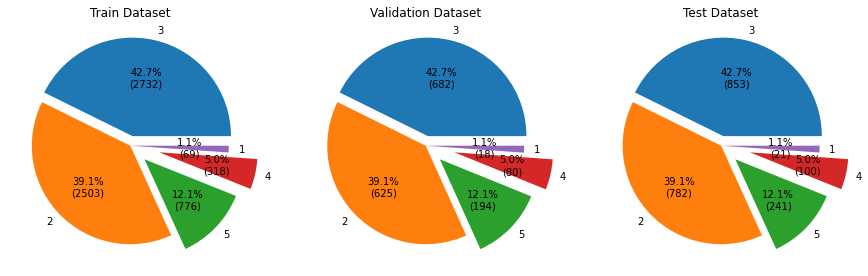

In [40]:
ig, axis = plt.subplots(1, 3, figsize=(15,15)) 
#ig = plt.figure(figsize =(15, 10))   

explode = (0.1, 0.0, 0.2, 0.3, 0.0)

labels = pd.DataFrame(data=y_train, columns=['DEFCON_Level'])['DEFCON_Level'].unique()
data = pd.DataFrame(data=y_train, columns=['DEFCON_Level']).value_counts()
axis[0].pie(data, labels=labels, autopct = lambda pct: func(pct, data), explode=explode)

data = pd.DataFrame(data=y_val, columns=['DEFCON_Level']).value_counts()
axis[1].pie(data, labels=labels, autopct = lambda pct: func(pct, data), explode=explode)

data = pd.DataFrame(data=y_test, columns=['DEFCON_Level']).value_counts()
axis[2].pie(data, labels=labels, autopct = lambda pct: func(pct, data), explode=explode)
axis[0].title.set_text('Train Dataset')
axis[1].title.set_text('Validation Dataset')
axis[2].title.set_text('Test Dataset')
plt.show()

__Observation:__ Our dataset is distributed with proportionate count for each class

<a id=section204></a>
### 2.4 Basic EDA on the Train Data



Feature importance of features on test data

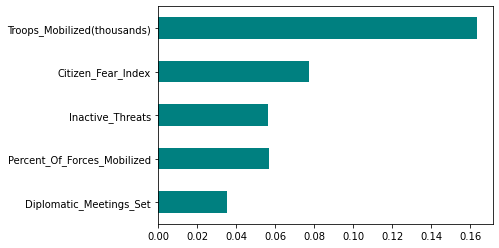

In [41]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X_train,y_train)
feat_importance= pd.Series(importances, X_train.columns[0:len(X_train.columns)])
feat_importance.plot(kind='barh',color='teal')
plt.show()

- Drawing heatmap to see the correlation among variables

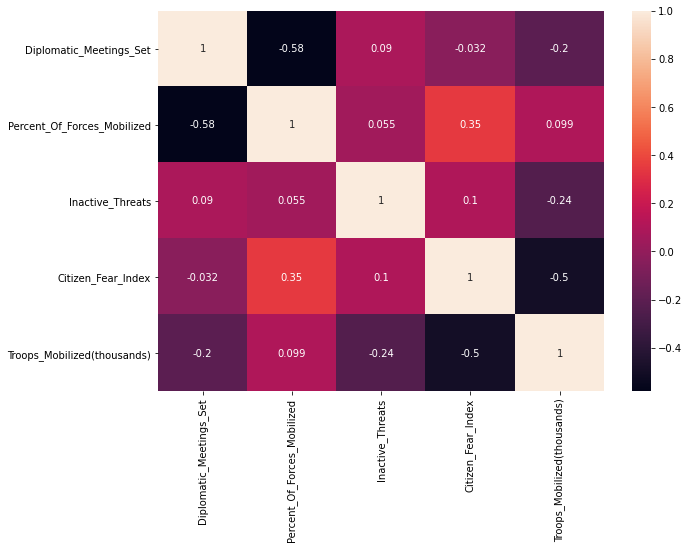

In [42]:
# plotting the heatmap
fig= plt.figure(figsize=(10,7))
hm = sns.heatmap(data = X_train.corr(), annot=True)
 
# displaying the plotted heatmap
plt.show()

__Observations:__ None of the features look collinear

- We will have a quick look at the joint distribution of a few pairs of columns from the training set.

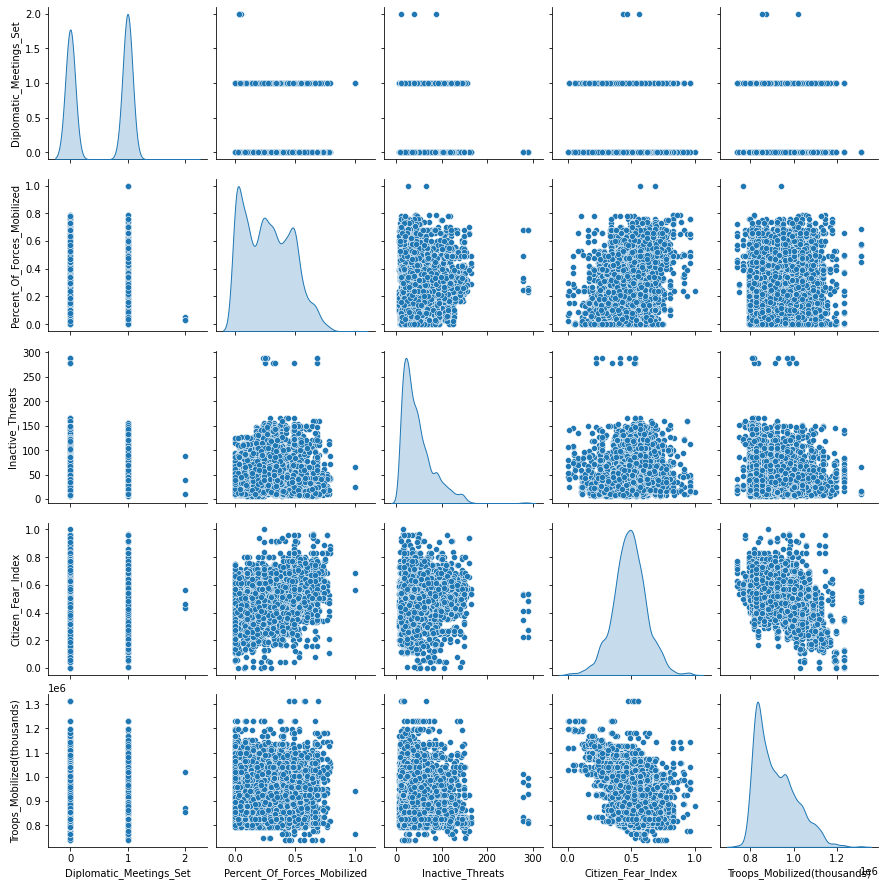

In [45]:
sns.pairplot(X_train, diag_kind='kde')
plt.show()

__Observation:__ As seen in the heatmap as well. We don't have multicollinearity in our data

<a id=section205></a>
### 2.5 One-Hot encode Target Variable

As our problem is multiclassLabel we will encode the target variable and also perform one-hot encoding on them. 

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#Label encode train target variable
le.fit(y_train)
y_train = le.transform(y_train)

#Label encode val target variable
le.fit(y_val)
y_val = le.transform(y_val)

#Label encode test target variable
le.fit(y_test)
y_test = le.transform(y_test)

# as our target variable is multiclass we will convert to dummy variables (i.e. one hot encoded) for training data
y_train_dummy = np_utils.to_categorical(y_train, num_classes=5)
# convert integers to dummy variables (i.e. one hot encoded) for training data
y_val_dummy = np_utils.to_categorical(y_val, num_classes=5)
# convert integers to dummy variables (i.e. one hot encoded) for training data
y_test_dummy = np_utils.to_categorical(y_test, num_classes=5)


In [53]:
# checking shapes of train nd test target variables 
print(f"Features Shape: Train {X_train.shape}  Validation {X_val.shape} Test {X_test.shape}")
print(f"Target Shape: Train {y_train_dummy.shape} Validation {y_val_dummy.shape} Test {y_test_dummy.shape}")


Features Shape: Train (6400, 5)  Validation (1600, 5) Test (2000, 5)
Target Shape: Train (6400, 5) Validation (1600, 5) Test (2000, 5)


<a id=section206></a>
### 2.6 Normalize the Data

- Our dataset has features in multiple scales. We will normalize the data. Let's check some statistics of train dataset

In [54]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Diplomatic_Meetings_Set,6400.0,0.528906,0.500141,0.0,0.000000,1.000000,1.000000,2.0
Percent_Of_Forces_Mobilized,6400.0,0.269822,0.195724,0.0,0.090000,0.260000,0.430000,1.0
Inactive_Threats,6400.0,46.660313,33.914757,6.0,21.000000,38.000000,62.000000,289.0
Citizen_Fear_Index,6400.0,0.485979,0.133113,0.0,0.406021,0.486784,0.567548,1.0
Troops_Mobilized(thousands),6400.0,917051.895833,92573.315491,739200.0,836000.000000,897600.000000,976800.000000,1311200.0


In [17]:
train_stats['mean']

Allied_Nations                       8.322500
Diplomatic_Meetings_Set              0.519531
Percent_Of_Forces_Mobilized          0.271983
Hostile_Nations                      2.502656
Active_Threats                      15.781562
Inactive_Threats                    46.333672
Citizen_Fear_Index                   0.487290
Closest_Threat_Distance(km)        350.731475
Aircraft_Carriers_Responding         0.888750
Troops_Mobilized(thousands)     917030.354167
DEFCON_Level                         2.608281
Name: mean, dtype: float64

__Observation:__ All features are in different scales. 


- Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

- **Note**: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the vaidation and test dataset.

  - We need to do that to project the validation and test dataset into the same distribution that the model has been trained on.

In [56]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [28]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Allied_Nations,6400.0,8.322500,1.756125,5.00,7.000000,8.000000,9.000000,16.00
Diplomatic_Meetings_Set,6400.0,0.519531,0.500595,0.00,0.000000,1.000000,1.000000,2.00
Percent_Of_Forces_Mobilized,6400.0,0.271983,0.196898,0.00,0.090000,0.260000,0.430000,1.00
Active_Threats,6400.0,15.781562,10.481334,1.00,7.000000,13.000000,21.000000,72.00
Inactive_Threats,6400.0,46.333672,33.556838,6.00,21.000000,37.000000,63.000000,289.00
Citizen_Fear_Index,6400.0,0.487290,0.134574,0.00,0.406021,0.486784,0.567548,1.00
Closest_Threat_Distance(km),6400.0,350.731475,16.345838,290.44,340.260000,350.860000,360.400000,425.06
Troops_Mobilized(thousands),6400.0,917030.354167,92260.948597,739200.00,836000.000000,897600.000000,976800.000000,1311200.00


In [57]:
#Normalizing data for train, val and test
normed_X_train = norm(X_train)
normed_X_val = norm(X_val)
normed_X_test = norm(X_test)
print('Check the shape of normalized features datasets: ', normed_X_train.shape, normed_X_val.shape, normed_X_test.shape )

Check the shape of normalized features datasets:  (6400, 5) (1600, 5) (2000, 5)


- This normalized data is what we will use to train the model.

- The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.

  - That includes the test set as well as live data when the model is used in production.

In [58]:
normed_X_train.describe()

,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Inactive_Threats,Citizen_Fear_Index,Troops_Mobilized(thousands)
count,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03
mean,8.708312e-17,1.311798e-14,-5.294376e-17,-1.017233e-15,-2.869874e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.057514e+00,-1.378580e+00,-1.198897e+00,-3.650876e+00,-1.921200e+00
25%,-1.057514e+00,-9.187500e-01,-7.566120e-01,-6.006812e-01,-8.755428e-01
50%,9.419219e-01,-5.018214e-02,-2.553553e-01,6.048335e-03,-2.101242e-01
75%,9.419219e-01,8.183857e-01,4.523013e-01,6.127779e-01,6.454139e-01
max,2.941358e+00,3.730642e+00,7.145553e+00,3.861539e+00,4.257686e+00


- Check for multicollinearity among features once again

In [60]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = normed_X_train.iloc[:,:]
display(calc_vif(X))

,variables,VIF
0,Diplomatic_Meetings_Set,1.617619
1,Percent_Of_Forces_Mobilized,1.955128
2,Inactive_Threats,1.089284
3,Citizen_Fear_Index,1.733989
4,Troops_Mobilized(thousands),1.588159


__Observation:__ None of the column has VIF value more than which indicates there are is no multicollinearity

#### Final Check on feature importance on normalized Data

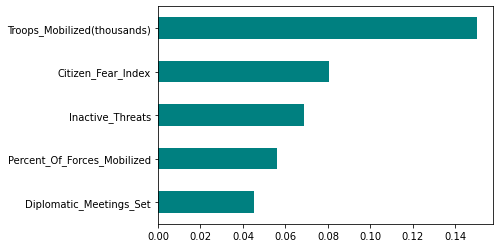

In [62]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(normed_X_train,y_train)
feat_importance= pd.Series(importances, normed_X_train.columns[0:len(normed_X_train.columns)])
feat_importance.plot(kind='barh',color='teal')
plt.show()

<a id=section3></a>
## 3. The Models

<a id=section301></a>
### 3.1 Basic Model



#### 3.1.1 Model Definition

- Let's build our model.

11 inputs -> [8 hidden nodes] -> 5 outputs </br> Layer Activation: 'Relu'</br>
Output Layer Activation: “softmax” ; This is to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities.</br>
Finally, the network uses the efficient 'Adam' gradient descent optimization algorithm with a logarithmic loss function, which is called “categorical_crossentropy” in Keras. We will be evaulating 'Accuracy' of the model as metric

- The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [37]:
#Checking number of inputs features and output nodes
normed_X_train.shape[1], y_train_dummy.shape[1]

(6, 5)

- We have 5 outputs
- As we have imbalance data let's pass weights classes differently

In [38]:
def class_weight(labels_dict,mu=0.15):
  total = np.sum(labels_dict.values())
  keys = labels_dict.keys()
  weight = dict()
  for i in keys:
    score = np.log(mu*6400/float(labels_dict[i]))
    weight[i] = score if score > 1 else 1
  return weight
# random labels_dict
labels_dict = (train_dataset['DEFCON_Level']-1).value_counts().to_dict()
weights = class_weight(labels_dict)
weights
#print(labels_dict)
#total =np.sum(labels_dict.values())
#total

{0: 1.0892809612392254, 1: 1, 2: 1, 3: 1, 4: 2.6042534074205665}

- Define the model

In [39]:
input_shape = (normed_X_train.shape[1],)
print('Input Shape:', input_shape)
output_shape = y_train_dummy.shape[1]
print('Output Shape: ', output_shape)

Input Shape: (6,)
Output Shape:  5


In [40]:
def build_model():
  model = Sequential()
  model.add(Dense(8, activation='relu', input_shape=input_shape,  kernel_initializer='zeros'))
  model.add(Dense(output_shape, activation='softmax'))  

  # Defining the optimizer with a specific learning rate of 0.001
  optimizer = tf.keras.optimizers.Adam(0.001)
  # Compiling the model
  model.compile( optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

  return model
model = build_model()

<a id=section302></a>
#### 3.1.2 Inspect the Model

- Using the `.summary` method to print a simple description of the model

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


- Our mode has just two layers and parmeters for first hidden layers are 88 (10(feasures) * 8 (nodes)=80 + 8 biases). Similarly for second layer we have 45 paramters (8 (inputs from first layer)*5(nodes)=40 + 5 biases)
- Now let's try out the model.

- without training the model taking a batch of `10` examples from the training data and calling `model.predict` on it.

In [42]:
example_batch = normed_X_train[:10]
example_result = model.predict(example_batch)
print('Shape of Predictions: ', example_result.shape)
example_result

Shape of Predictions:  (10, 5)


array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]], dtype=float32)

- It seems to be working, and it produces a result of the expected shape and type.

- We haven't trained the model yet, and as a result the above predictions are like this. 

<a id=section303></a>
#### 3.1.2 Train the Model

- Training the model for 200 epochs, and recording the training and validation accuracy in the `history` object.

- We are using `tfdocs.modeling.EpochDots()` callback to print a "." every epoch, with reports after each 100 epochs.

  - These print settings are the default values, i. e. printing a "." after each epoch and a report after 100 epochs.

  - We can change these as per our requirements in the callback.

In [43]:
EPOCHS = 200

In [44]:
history = model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.4159,  loss:1.5763,  val_accuracy:0.4187,  val_loss:1.4818,  
....................
Epoch: 20, accuracy:0.4295,  loss:1.2655,  val_accuracy:0.4187,  val_loss:1.2153,  
....................
Epoch: 40, accuracy:0.4295,  loss:1.2651,  val_accuracy:0.4187,  val_loss:1.2128,  
....................
Epoch: 60, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2127,  
....................
Epoch: 80, accuracy:0.4295,  loss:1.2651,  val_accuracy:0.4187,  val_loss:1.2127,  
....................
Epoch: 100, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2126,  
....................
Epoch: 120, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2126,  
....................
Epoch: 140, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2126,  
....................
Epoch: 160, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2127,  
....................
Epoch: 180, accuracy:0.4295,  loss:1.2651,  val_acc

<a id=section303></a>
#### 3.1.3 Model Evaluation

- Visualizing the model's training progress using the stats stored in the `history` object.

In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.265158,0.429531,1.212680,0.41875,195
196,1.265151,0.429531,1.212767,0.41875,196
197,1.265145,0.429531,1.212692,0.41875,197
198,1.265195,0.429531,1.212697,0.41875,198
199,1.265145,0.429531,1.212645,0.41875,199


- Plotting the **accuracy** plot for train and val set.
- Plotting the **loss** plot for train and val set.

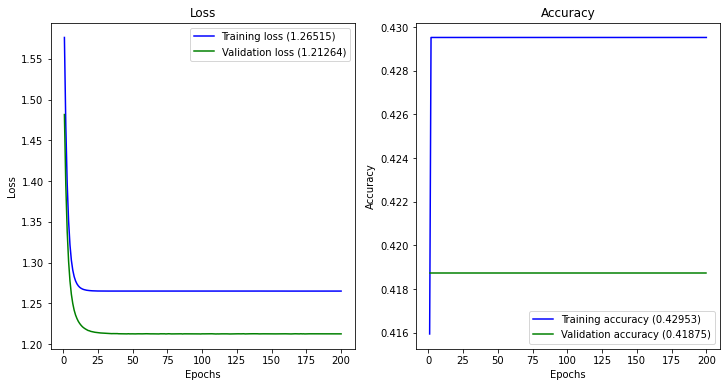

In [46]:
plot_history(history)

- Looking at Accuracy graph we can see training and validation accuracy does not reach beyond 45%. IT seems model is not earning enough to do predictions

- Also, it appears that model is not learning after certain epohs

- Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve.

- We'll use an *EarlyStopping callback* that tests a training condition for  every epoch.

  - If a set amount of epochs elapses without showing improvement, then automatically stop the training. Here we are adding a patience of 20 epochs

- Full report on the Validation Set

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.41875

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        78
           1    0.41875   1.00000   0.59031       670
           2    0.00000   0.00000   0.00000       614
           3    0.00000   0.00000   0.00000       219
           4    0.00000   0.00000   0.00000        19

    accuracy                        0.41875      1600
   macro avg    0.08375   0.20000   0.11806      1600
weighted avg    0.17535   0.41875   0.24719      1600

[[  0  78   0   0   0]
 [  0 670   0   0   0]
 [  0 614   0   0   0]
 [  0 219   0   0   0]
 [  0  19   0   0   0]]


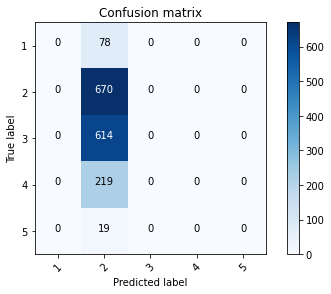

In [47]:
full_multiclass_report(model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

- Full report on Test Dataset

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.4255

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        97
           1    0.42550   1.00000   0.59698       851
           2    0.00000   0.00000   0.00000       785
           3    0.00000   0.00000   0.00000       247
           4    0.00000   0.00000   0.00000        20

    accuracy                        0.42550      2000
   macro avg    0.08510   0.20000   0.11940      2000
weighted avg    0.18105   0.42550   0.25402      2000

[[  0  97   0   0   0]
 [  0 851   0   0   0]
 [  0 785   0   0   0]
 [  0 247   0   0   0]
 [  0  20   0   0   0]]


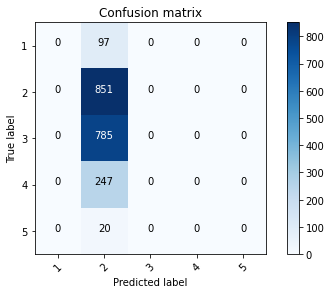

In [48]:
full_multiclass_report(model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

<a id=section303></a>
#### 3.1.4 Train the Model with Early Stopping

In [49]:
es_model = build_model()

In [50]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [51]:
early_history = es_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots( report_every=20)])





Epoch: 0, accuracy:0.4025,  loss:1.5775,  val_accuracy:0.4187,  val_loss:1.4825,  
....................
Epoch: 20, accuracy:0.4295,  loss:1.2655,  val_accuracy:0.4187,  val_loss:1.2154,  
....................
Epoch: 40, accuracy:0.4295,  loss:1.2651,  val_accuracy:0.4187,  val_loss:1.2128,  
....................
Epoch: 60, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2127,  
..................

<a id=section303></a>
#### 3.1.5 Evaulate EarlyStopping model 

In [52]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
73,1.265119,0.429531,1.212626,0.41875,73
74,1.265183,0.429531,1.212655,0.41875,74
75,1.265130,0.429531,1.212630,0.41875,75
76,1.265147,0.429531,1.212638,0.41875,76
77,1.265162,0.429531,1.212669,0.41875,77


- The training stopped before completing the 75 epochs due to our EarlyStopping callback as model was not showing improvement



- Plotting training history using HistoryPlotter

- Specifying the name of our **history** object in the `plotter.plot()` method.

- We also need to specify the **metric** we want to plot.

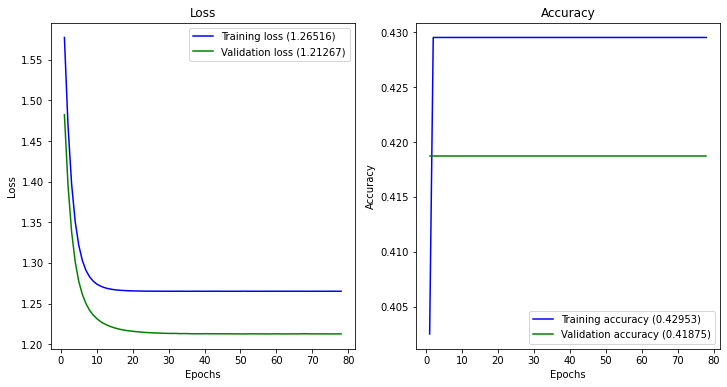

In [53]:
plot_history(early_history)

- Full Model performance report on Test dataset

In [54]:
normed_X_val.shape, y_val_dummy.shape

((1600, 6), (1600, 5))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.41875

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        78
           1    0.41875   1.00000   0.59031       670
           2    0.00000   0.00000   0.00000       614
           3    0.00000   0.00000   0.00000       219
           4    0.00000   0.00000   0.00000        19

    accuracy                        0.41875      1600
   macro avg    0.08375   0.20000   0.11806      1600
weighted avg    0.17535   0.41875   0.24719      1600

[[  0  78   0   0   0]
 [  0 670   0   0   0]
 [  0 614   0   0   0]
 [  0 219   0   0   0]
 [  0  19   0   0   0]]


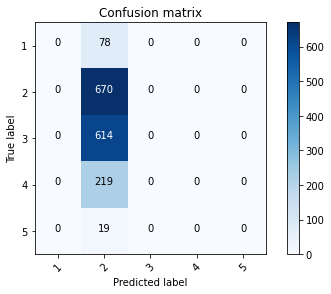

In [55]:
full_multiclass_report(es_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

- Full Model performance report on Test dataset

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.4255

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        97
           1    0.42550   1.00000   0.59698       851
           2    0.00000   0.00000   0.00000       785
           3    0.00000   0.00000   0.00000       247
           4    0.00000   0.00000   0.00000        20

    accuracy                        0.42550      2000
   macro avg    0.08510   0.20000   0.11940      2000
weighted avg    0.18105   0.42550   0.25402      2000

[[  0  97   0   0   0]
 [  0 851   0   0   0]
 [  0 785   0   0   0]
 [  0 247   0   0   0]
 [  0  20   0   0   0]]


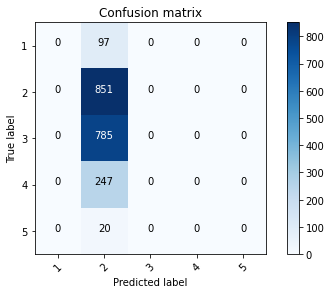

In [56]:
full_multiclass_report(es_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

- The graph shows that on the validation set, the average error is usually around **+/- 2 MPG**.

- Is this good? We'll leave that decision up to you.

- Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.

- This tells us how well we can expect the model to predict when we use it in the real world.

- Model is giving high accuracy for training as well as for test. This could be due to data is synthatic

- Finally, **predict DEFCON levels** values using data in the testing set and comparing the results:
- Get ROC AUC Score 

- It looks like our model predicts reasonably well or we can say we have synthetic data so model has given near perfect results.

- We could see some false predictions for DEFCON level 5 

<a id=section4></a>
### 3.2. Model Tuning

- We have already achieved very good result on our test set.

- If we train the model for too long, the model will start to overfit and learn patterns from the training data that don't generalize to the test data.

  - We need to strike a balance.
  
  - We have already learned how to train for an appropriate number of epochs using the **Early Stopping** callback.

- And, now we will experiment some additional methods to **improve** the model **performance** and reduce overfitting.

  - These methods will all be applied during model building.

<a id=section401></a>
#### 3.2.1 Increasing the Number of Hidden Layers and Hidden Units

- We can improve model performance by increasing the number of hidden layers and hidden units in the model.

  - But this can result in overfitting.

- Here, we are increasing the number of **hidden layers** from 2 to **4** i. e. adding 2 additional layers.

- Next, we are using **32 hidden units** instead of 8.

- Define the Model

In [57]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=input_shape))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(output_shape, activation='softmax'))  


  return model
multilayered_model = build_model()

- Inspect the Model

In [58]:
multilayered_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
Total params: 3,557
Trainable params: 3,557
Non-trainable params: 0
_________________________________________________________________


- Compile the Model

Lets try with a different optimizer this time

In [59]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
multilayered_model.compile( optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


- We are not using the Early Stopping callback now.

- The model will be trained for **20 epochs**.

In [60]:
history_multilayered = multilayered_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.4963,  loss:1.2062,  val_accuracy:0.5444,  val_loss:1.0327,  
....................
Epoch: 20, accuracy:0.5688,  loss:1.0087,  val_accuracy:0.5738,  val_loss:0.9918,  
....................
Epoch: 40, accuracy:0.5808,  loss:0.9773,  val_accuracy:0.5725,  val_loss:0.9893,  
....................
Epoch: 60, accuracy:0.5813,  loss:0.9566,  val_accuracy:0.5781,  val_loss:0.9717,  
....................
Epoch: 80, accuracy:0.5880,  loss:0.9415,  val_accuracy:0.5581,  val_loss:1.0079,  
....................
Epoch: 100, accuracy:0.5927,  loss:0.9311,  val_accuracy:0.5838,  val_loss:0.9994,  
....................
Epoch: 120, accuracy:0.5989,  loss:0.9215,  val_accuracy:0.5800,  val_loss:1.0153,  
....................
Epoch: 140, accuracy:0.6028,  loss:0.9094,  val_accuracy:0.5731,  val_loss:1.0255,  
....................
Epoch: 160, accuracy:0.6062,  loss:0.9082,  val_accuracy:0.5494,  val_loss:1.0593,  
....................
Epoch: 180, accuracy:0.6020,  loss:0.9022,  val_acc

In [61]:
df_multilayered_model = pd.DataFrame(history_multilayered.history)
df_multilayered_model['epoch'] = history_multilayered.epoch
df_multilayered_model.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.892377,0.610625,1.085362,0.556250,195
196,0.889357,0.607031,1.071829,0.576875,196
197,0.891536,0.615313,1.115506,0.565000,197
198,0.887739,0.616562,1.090358,0.559375,198
199,0.887439,0.615469,1.082583,0.566875,199


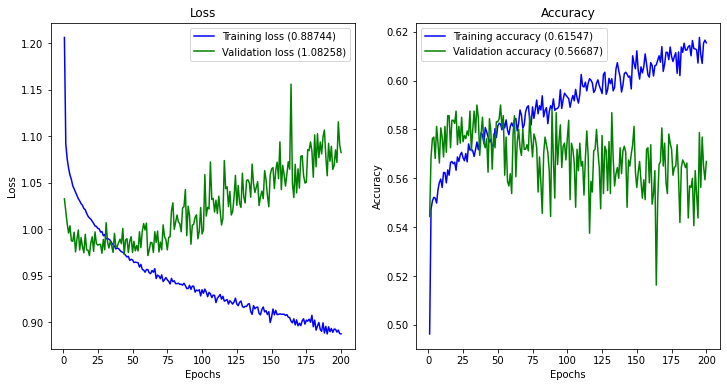

In [62]:
plot_history(history_multilayered)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.566875

Classification Report
              precision    recall  f1-score   support

           0    0.43750   0.17949   0.25455        78
           1    0.62457   0.81940   0.70884       670
           2    0.56739   0.42508   0.48603       614
           3    0.47239   0.35160   0.40314       219
           4    0.09091   0.31579   0.14118        19

    accuracy                        0.56688      1600
   macro avg    0.43855   0.41827   0.39875      1600
weighted avg    0.56634   0.56688   0.55261      1600

[[ 14  47  14   3   0]
 [  7 549  97   8   9]
 [  8 251 261  70  24]
 [  3  32  80  77  27]
 [  0   0   8   5   6]]


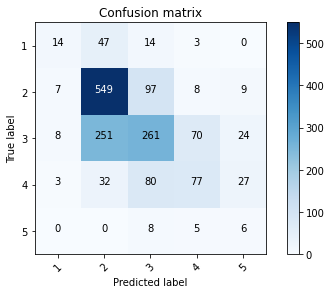

In [63]:
full_multiclass_report(multilayered_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5515

Classification Report
              precision    recall  f1-score   support

           0    0.22414   0.13402   0.16774        97
           1    0.60956   0.79436   0.68980       851
           2    0.56545   0.39618   0.46592       785
           3    0.43612   0.40081   0.41772       247
           4    0.07143   0.20000   0.10526        20

    accuracy                        0.55150      2000
   macro avg    0.38134   0.38507   0.36929      2000
weighted avg    0.54675   0.55150   0.53716      2000

[[ 13  67  14   2   1]
 [ 23 676 133  16   3]
 [ 19 330 311 102  23]
 [  3  34  86  99  25]
 [  0   2   6   8   4]]


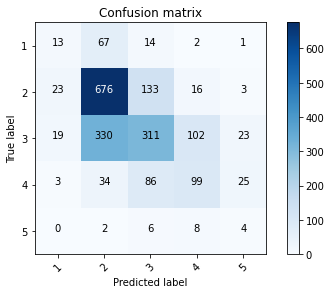

In [64]:
full_multiclass_report(multilayered_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [65]:
# evaluate the model
_, train_acc = multilayered_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = multilayered_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.610, Test: 0.552


- We get a slight increase in the test set results.

- It seems the deeper model is **overfitting** the train set.

- The performanceis still not up to the mark

- We will continue with other options to improve our model performance

<a id=section402></a>
#### 3.2.2 Weight Regularization

- Regularization places **constraints** on the quantity and type of information the model can store.

- If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

- We can put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".

- This is called "**weight regularization**", and it is done by adding to the loss function of the network a cost associated with having large weights.

- This cost comes in two flavors:

  - L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

  - L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights).
    - L2 regularization is also called weight decay in the context of neural networks.
    
    - Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

- L1 regularization pushes weights towards exactly zero encouraging a sparse model.

- L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights.

  - One reason why L2 is more common.

- In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

- Let's add L2 weight regularization to the model.

In [66]:
from tensorflow.keras import regularizers

In [67]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(output_shape, activation='softmax'))  
  

  return model
l2_model = build_model()

- `l2(0.001)` means that every coefficient in the weight matrix of the layer will add `(0.001 * weight_coefficient_value**2)` to the total loss of the network.

In [68]:
l2_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 165       
Total params: 3,557
Trainable params: 3,557
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(.005)
# Compiling the model
l2_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [70]:
history_l2 = l2_model.fit(normed_X_train, y_train_dummy, epochs=200, class_weight=weights, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5258,  loss:1.2070,  val_accuracy:0.5663,  val_loss:1.0763,  
....................
Epoch: 20, accuracy:0.5559,  loss:1.0625,  val_accuracy:0.5838,  val_loss:1.0200,  
....................
Epoch: 40, accuracy:0.5631,  loss:1.0539,  val_accuracy:0.5725,  val_loss:1.0174,  
....................
Epoch: 60, accuracy:0.5558,  loss:1.0464,  val_accuracy:0.5838,  val_loss:1.0090,  
....................
Epoch: 80, accuracy:0.5638,  loss:1.0409,  val_accuracy:0.5744,  val_loss:1.0109,  
....................
Epoch: 100, accuracy:0.5605,  loss:1.0387,  val_accuracy:0.5688,  val_loss:1.0085,  
....................
Epoch: 120, accuracy:0.5605,  loss:1.0396,  val_accuracy:0.5731,  val_loss:1.0113,  
....................
Epoch: 140, accuracy:0.5625,  loss:1.0342,  val_accuracy:0.5694,  val_loss:1.0180,  
....................
Epoch: 160, accuracy:0.5638,  loss:1.0332,  val_accuracy:0.5819,  val_loss:1.0301,  
....................
Epoch: 180, accuracy:0.5672,  loss:1.0294,  val_acc

In [71]:
hist_l2 = pd.DataFrame(history_l2.history)
hist_l2['epoch'] = history_l2.epoch
hist_l2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.028117,0.567813,1.008332,0.571875,195
196,1.035827,0.567969,1.022905,0.575625,196
197,1.025780,0.564687,1.039217,0.566250,197
198,1.035330,0.566406,1.024666,0.573125,198
199,1.028076,0.564375,1.021705,0.568750,199


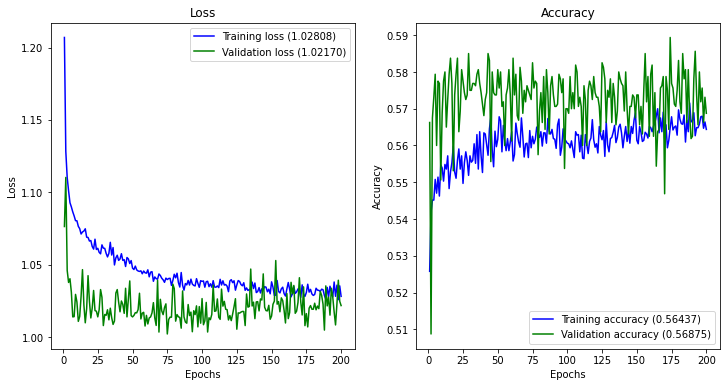

In [72]:
plot_history(history_l2)

- With more training model tries to learn more on training data but couldn't do well on validation data
- With regularization model improved just slightly.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.56875

Classification Report
              precision    recall  f1-score   support

           0    0.66667   0.05128   0.09524        78
           1    0.61149   0.81045   0.69705       670
           2    0.52353   0.57980   0.55023       614
           3    0.62500   0.02283   0.04405       219
           4    0.11111   0.10526   0.10811        19

    accuracy                        0.56875      1600
   macro avg    0.50756   0.31393   0.29894      1600
weighted avg    0.57633   0.56875   0.51500      1600

[[  4  59  15   0   0]
 [  2 543 125   0   0]
 [  0 252 356   3   3]
 [  0  30 171   5  13]
 [  0   4  13   0   2]]


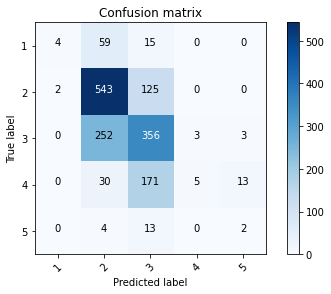

In [73]:
full_multiclass_report(l2_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5625

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        97
           1    0.59811   0.81669   0.69051       851
           2    0.52638   0.53376   0.53004       785
           3    0.61538   0.03239   0.06154       247
           4    0.12000   0.15000   0.13333        20

    accuracy                        0.56250      2000
   macro avg    0.37197   0.30657   0.28309      2000
weighted avg    0.53830   0.56250   0.51079      2000

[[  0  79  18   0   0]
 [  3 695 151   0   2]
 [  1 352 419   5   8]
 [  0  35 192   8  12]
 [  0   1  16   0   3]]


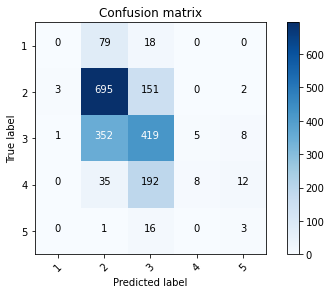

In [74]:
full_multiclass_report(l2_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [75]:
# evaluate the model
_, train_acc = l2_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = l2_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.565, Test: 0.562


- After adding L2 regularization, the test set error is reduced.

- The performance on the test set is better than the larger model.

- The L2 regularized model is much more resistant to overfitting than the larger model.

<a id=section403></a>
#### 3.2.3 Dropout

- Dropout is one of the **most effective** and **most commonly used** regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto.

- The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.

- Dropout, applied to a layer, consists of **randomly** "**dropping out**" (i.e. set to zero) a number of **output features** of the layer during training.

  - Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training.
  
  - After applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

- The "**dropout rate**" is the fraction of the features that are being zeroed-out; it is usually set between **0.2** and **0.5**.

- *At test time*, **no units are dropped out**, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

- In `tf.keras` we can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

- Let's add Dropout layers in our network to see how well they do at reducing overfitting.

In [76]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=input_shape))
  model.add(Dropout(0.02))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.02))
  model.add(Dense(64, activation='relu'))
  #model.add(Dropout(0.02))
  #model.add(Dense(256, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(Dense(output_shape, activation='softmax'))    

  return model
dropout_model = build_model()

In [77]:
dropout_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                224       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 325       
Total params: 6,821
Trainable params: 6,821
Non-trainable params: 0
____________________________________________________

In [78]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(0.01)
# Compiling the model
dropout_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
history_dropout = dropout_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=1000, validation_data=(normed_X_val, y_val_dummy), batch_size=500,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=100)])


Epoch: 0, accuracy:0.4850,  loss:1.2762,  val_accuracy:0.5569,  val_loss:1.0412,  
....................................................................................................
Epoch: 100, accuracy:0.6292,  loss:0.8302,  val_accuracy:0.5750,  val_loss:1.0891,  
....................................................................................................
Epoch: 200, accuracy:0.6947,  loss:0.7114,  val_accuracy:0.5512,  val_loss:1.2121,  
....................................................................................................
Epoch: 300, accuracy:0.7277,  loss:0.6459,  val_accuracy:0.5562,  val_loss:1.3376,  
....................................................................................................
Epoch: 400, accuracy:0.7362,  loss:0.6454,  val_accuracy:0.5462,  val_loss:1.4061,  
....................................................................................................
Epoch: 500, accuracy:0.7517,  loss:0.6070,  val_accuracy:0.5575,  val_l

In [80]:
hist_dropout = pd.DataFrame(history_dropout.history)
hist_dropout['epoch'] = history_dropout.epoch
hist_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.586670,0.775469,1.611585,0.531250,995
996,0.565901,0.772187,1.589711,0.525000,996
997,0.578184,0.764687,1.582958,0.535625,997
998,0.579779,0.771250,1.587853,0.547500,998
999,0.581156,0.765000,1.595454,0.526875,999


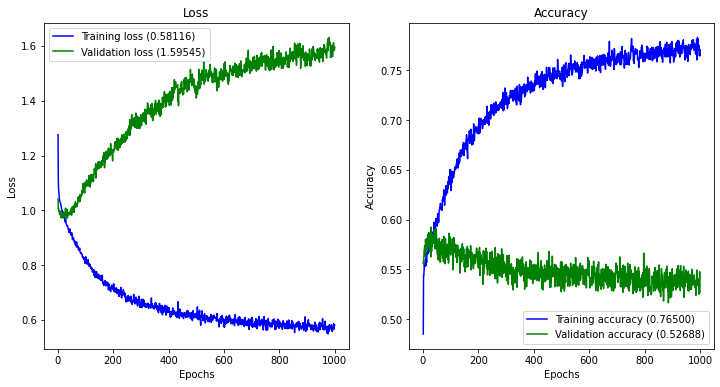

In [81]:
plot_history(history_dropout)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.526875

Classification Report
              precision    recall  f1-score   support

           0    0.25373   0.21795   0.23448        78
           1    0.61781   0.67313   0.64429       670
           2    0.49581   0.48208   0.48885       614
           3    0.44048   0.33790   0.38243       219
           4    0.13158   0.26316   0.17544        19

    accuracy                        0.52687      1600
   macro avg    0.38788   0.39485   0.38510      1600
weighted avg    0.52320   0.52687   0.52325      1600

[[ 17  38  20   3   0]
 [ 34 451 168  14   3]
 [ 12 216 296  73  17]
 [  4  23 105  74  13]
 [  0   2   8   4   5]]


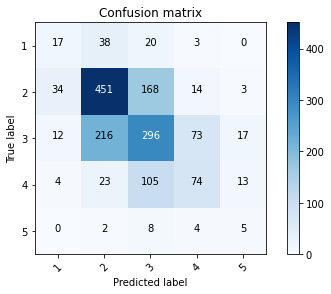

In [82]:
full_multiclass_report(dropout_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.517

Classification Report
              precision    recall  f1-score   support

           0    0.16484   0.15464   0.15957        97
           1    0.60280   0.65805   0.62921       851
           2    0.51366   0.47898   0.49572       785
           3    0.38049   0.31579   0.34513       247
           4    0.11628   0.25000   0.15873        20

    accuracy                        0.51700      2000
   macro avg    0.35561   0.37149   0.35767      2000
weighted avg    0.51425   0.51700   0.51425      2000

[[ 15  61  21   0   0]
 [ 44 560 219  25   3]
 [ 26 270 376  94  19]
 [  6  38 109  78  16]
 [  0   0   7   8   5]]


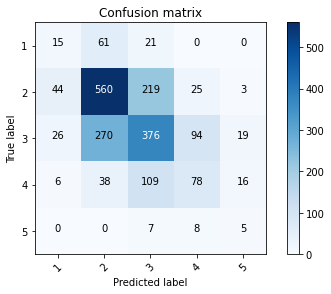

In [83]:
full_multiclass_report(dropout_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [84]:
# evaluate the model
_, train_acc = dropout_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = dropout_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.844, Test: 0.517


- After adding the dropout the model is generalizing well on the test set.

- The performance is better than the larger model.

<a id=section404></a>
#### 3.2.4 Combined L2 + Dropout

- We can also combine both L2 regularization and Dropout in a single model.

In [85]:
from tensorflow.keras import regularizers

In [86]:
def build_model():
  model = Sequential()
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
  model.add(Dropout(0.02))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.02))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.02))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(output_shape, activation='softmax'))  

  return model
l2_dropout_model = build_model()

In [87]:
l2_dropout_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               3584      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)              

In [88]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
l2_dropout_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
history_l2_dropout = l2_dropout_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), batch_size=300,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])



Epoch: 0, accuracy:0.4995,  loss:2.3732,  val_accuracy:0.5400,  val_loss:2.0077,  
....................
Epoch: 20, accuracy:0.5547,  loss:1.0752,  val_accuracy:0.5587,  val_loss:1.0401,  
....................
Epoch: 40, accuracy:0.5617,  loss:1.0530,  val_accuracy:0.5581,  val_loss:1.0527,  
....................
Epoch: 60, accuracy:0.5703,  loss:1.0374,  val_accuracy:0.5819,  val_loss:1.0163,  
....................
Epoch: 80, accuracy:0.5700,  loss:1.0227,  val_accuracy:0.5738,  val_loss:1.0519,  
....................
Epoch: 100, accuracy:0.5772,  loss:1.0152,  val_accuracy:0.5800,  val_loss:1.0332,  
....................
Epoch: 120, accuracy:0.5822,  loss:1.0015,  val_accuracy:0.5663,  val_loss:1.0491,  
....................
Epoch: 140, accuracy:0.5847,  loss:1.0015,  val_accuracy:0.5919,  val_loss:1.0268,  
....................
Epoch: 160, accuracy:0.5881,  loss:0.9858,  val_accuracy:0.5813,  val_loss:1.0476,  
....................
Epoch: 180, accuracy:0.5922,  loss:0.9805,  val_acc

In [90]:
hist_l2_dropout = pd.DataFrame(history_l2_dropout.history)
hist_l2_dropout['epoch'] = history_l2_dropout.epoch
hist_l2_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.974778,0.598437,1.064088,0.578750,195
196,0.976263,0.595937,1.081137,0.571875,196
197,0.977691,0.594531,1.042723,0.597500,197
198,0.972910,0.595156,1.063658,0.572500,198
199,0.978238,0.597344,1.027042,0.591250,199


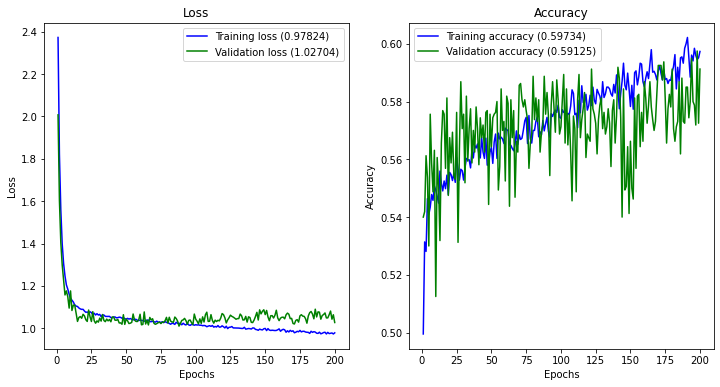

In [91]:
plot_history(history_l2_dropout)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.59125

Classification Report
              precision    recall  f1-score   support

           0    0.45455   0.12821   0.20000        78
           1    0.66106   0.76269   0.70825       670
           2    0.54747   0.56352   0.55538       614
           3    0.51678   0.35160   0.41848       219
           4    0.08333   0.10526   0.09302        19

    accuracy                        0.59125      1600
   macro avg    0.45264   0.38225   0.39503      1600
weighted avg    0.58079   0.59125   0.57784      1600

[[ 10  49  18   1   0]
 [  5 511 143   6   5]
 [  7 195 346  59   7]
 [  0  18 114  77  10]
 [  0   0  11   6   2]]


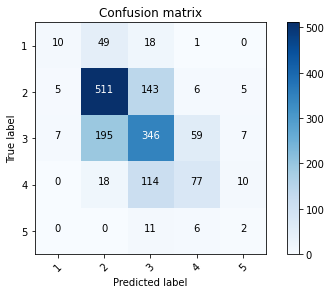

In [92]:
full_multiclass_report(l2_dropout_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5735

Classification Report
              precision    recall  f1-score   support

           0    0.20000   0.06186   0.09449        97
           1    0.63600   0.73913   0.68370       851
           2    0.55322   0.53631   0.54463       785
           3    0.45789   0.35223   0.39817       247
           4    0.13333   0.20000   0.16000        20

    accuracy                        0.57350      2000
   macro avg    0.39609   0.37790   0.37620      2000
weighted avg    0.55534   0.57350   0.56004      2000

[[  6  72  15   3   1]
 [ 14 629 192  14   2]
 [ 10 264 421  80  10]
 [  0  24 123  87  13]
 [  0   0  10   6   4]]


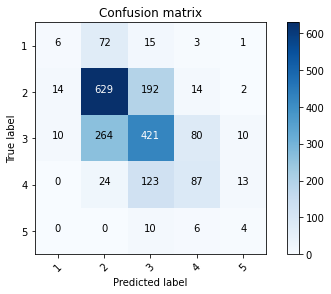

In [93]:
full_multiclass_report(l2_dropout_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [94]:
# evaluate the model
_, train_acc = l2_dropout_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = l2_dropout_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.613, Test: 0.573


- The combined L2 + Dropout model is also outperforming the larger model.

- We can attain a better score if we apply the Early Stopping callback to this model.

<a id=section405></a>
#### 3.2.5 Batch Normalization

- Batch normalization is a technique for training very deep neural networks.

    - It **normalizes** the **activations** of the previous layer at each batch.

    - It applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

- This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

- Batch normalization may be used on the inputs to the layer before or after the activation function in the previous layer.

- It may be more appropriate **after** the activation function for **s-shaped** functions like the **hyperbolic tangent** and **logistic** function.

- It may be more appropriate **before** the activation function for activations that may result in **non-Gaussian** distributions like the **rectified linear** activation function, the modern default for most network types.

- Since we are using **ReLU** activation function in our model, we will use the Batch Normalization layer **prior** to the ReLU layer.

In [95]:
def build_model():
  model = Sequential()
  model.add(Dense(256, input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(output_shape, activation='softmax'))    

  return model
bnorm_model = build_model()

In [96]:
bnorm_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)              

In [97]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
bnorm_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [98]:
history_batch_norm = bnorm_model.fit(normed_X_train, y_train_dummy, batch_size=300, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=80), tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5033,  loss:1.2070,  val_accuracy:0.5163,  val_loss:1.4157,  
....................
Epoch: 20, accuracy:0.6120,  loss:0.8673,  val_accuracy:0.5431,  val_loss:1.0463,  
....................
Epoch: 40, accuracy:0.6577,  loss:0.7732,  val_accuracy:0.5506,  val_loss:1.1213,  
....................
Epoch: 60, accuracy:0.7030,  loss:0.6735,  val_accuracy:0.5619,  val_loss:1.2000,  
....................
Epoch: 80, accuracy:0.7191,  loss:0.6339,  val_accuracy:0.5706,  val_loss:1.3363,  
................

In [99]:
hist_batch_norm = pd.DataFrame(history_batch_norm.history)
hist_batch_norm['epoch'] = history_batch_norm.epoch
hist_batch_norm.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
91,0.576619,0.750781,1.318880,0.543125,91
92,0.555620,0.760781,1.416937,0.536875,92
93,0.584335,0.749062,1.372748,0.550000,93
94,0.576045,0.743281,1.345062,0.530625,94
95,0.563782,0.760625,1.400382,0.528750,95


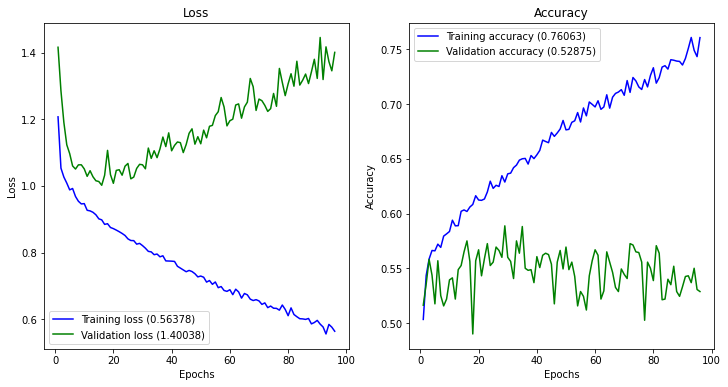

In [100]:
plot_history(history_batch_norm)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.52875

Classification Report
              precision    recall  f1-score   support

           0    0.15789   0.07692   0.10345        78
           1    0.61905   0.64030   0.62949       670
           2    0.49399   0.53583   0.51406       614
           3    0.44444   0.36530   0.40100       219
           4    0.08696   0.10526   0.09524        19

    accuracy                        0.52875      1600
   macro avg    0.36047   0.34472   0.34865      1600
weighted avg    0.51836   0.52875   0.52193      1600

[[  6  35  35   2   0]
 [ 24 429 194  20   3]
 [  6 203 329  66  10]
 [  2  24 105  80   8]
 [  0   2   3  12   2]]


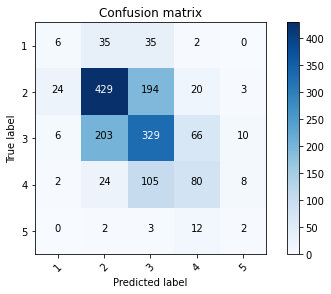

In [101]:
full_multiclass_report(bnorm_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.536

Classification Report
              precision    recall  f1-score   support

           0    0.28205   0.11340   0.16176        97
           1    0.62818   0.63925   0.63366       851
           2    0.50890   0.54650   0.52703       785
           3    0.39286   0.35628   0.37367       247
           4    0.00000   0.00000   0.00000        20

    accuracy                        0.53600      2000
   macro avg    0.36240   0.33108   0.33923      2000
weighted avg    0.52923   0.53600   0.53048      2000

[[ 11  48  36   1   1]
 [ 10 544 266  27   4]
 [ 13 238 429  96   9]
 [  4  36 105  88  14]
 [  1   0   7  12   0]]


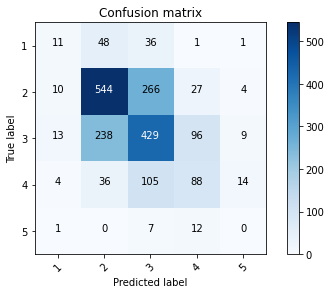

In [102]:
full_multiclass_report(bnorm_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [103]:
# evaluate the model
_, train_acc = bnorm_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = bnorm_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.755, Test: 0.536


- The Batch Normalization model attains the **lowest train set error**.

- We have seen significant **overfitting** here.

- It is not generalizing well on the test set.

- We can also incorporate the Early Stopping callback to this model to stop training at an appropriate epoch.

<a id=section5></a>
### 3.3. Hyperparamter Tuning

#### 3.3.1 Grid Search

In [104]:
dense_layers = [[6],[16],[32]]
for index, lsize in enumerate(dense_layers):
  print(index, lsize)

0 [6]
1 [16]
2 [32]


In [105]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='rmsprop'):
  model = Sequential()

  for index, lsize in enumerate(dense_layers):
    # Input Layer - includes the input_shape
    if index == 0:
      model.add(Dense(lsize, activation=activation, input_shape=input_shape))
    else:
      model.add(Dense(lsize, activation=activation))
            
  model.add(Dense(output_shape,activation='softmax'))
  model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model,
                        epochs=10, 
                        batch_size=5,
                        verbose=0)

param_grid = {'dense_layers': [[6],[16],[32]],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[10,50],
              'batch_size':[50,300]}

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')



In [106]:
grid_results = grid.fit(normed_X_train,y_train)
print('Parameters of the best model: ')
print(grid_results.best_params_)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will b

KeyboardInterrupt: ignored

#### 3.3.1 Define and initiate HyperModel Class

In [120]:
class MultiClassHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        #Input Layer
        model.add(
            layers.Dense(
                units=hp.Int('input_units', 32, 256, 32, default=32),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape, 
                kernel_initializer='glorot_uniform'
                #, bias_initializer='zeros'
            )
        )
        for i in range(hp.Int('num_layers', 1, 3)):
          model.add(layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)                    
            )   
          )
          model.add(
            layers.Dense(
                units=hp.Int(f'hid_{i}_units', min_value= 32, max_value=512, step=32, default=32),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu'),
                kernel_initializer='glorot_uniform'
                #, bias_initializer='zeros'
            )
          )
        

        #Output layer
        model.add(Dense(output_shape, activation='softmax'))
        #hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
        optimizer = hp.Choice('optimizer', ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'])
        #keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
        model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
        
        return model

In [121]:
hypermodel = MultiClassHyperModel(input_shape)

###Build, Run and Evaluate Random Search Tuner

In [104]:
import time
LOG_DIR = f"{int(time.time())}"
tensorboard = TensorBoard(log_dir=LOG_DIR)
tuner_rs = RandomSearch(
            hypermodel,
            objective= 'val_accuracy',
            seed=42,
            max_trials=5,
            executions_per_trial=3, overwrite=True,
            directory=LOG_DIR 
        )
#keras.callbacks.EarlyStopping(monitor='val_loss', patience=20), 
callbacks = [tensorboard, tfdocs.modeling.EpochDots( report_every=20)]
tuner_rs.search(normed_X_train, y_train_dummy, epochs=20, batch_size = 64, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=callbacks)





Epoch: 0, accuracy:0.3756,  loss:1.5644,  val_accuracy:0.5119,  val_loss:1.5058,  

Epoch: 0, accuracy:0.3100,  loss:1.5957,  val_accuracy:0.4487,  val_loss:1.5362,  

Epoch: 0, accuracy:0.3183,  loss:1.5348,  val_accuracy:0.4487,  val_loss:1.4089,  

Epoch: 0, accuracy:0.5323,  loss:1.0679,  val_accuracy:0.5819,  val_loss:0.9984,  

Epoch: 0, accuracy:0.5300,  loss:1.0626,  val_accuracy:0.5600,  val_loss:0.9992,  

Epoch: 0, accuracy:0.5275,  loss:1.0689,  val_accuracy:0.5569,  val_loss:1.0099,  

Epoch: 0, accuracy:0.3191,  loss:1.6006,  val_accuracy:0.4187,  val_loss:1.3852,  

Epoch: 0, accuracy:0.4247,  loss:1.4284,  val_accuracy:0.4187,  val_loss:1.3112,  

Epoch: 0, accuracy:0.3923,  loss:1.4580,  val_accuracy:0.3837,  val_loss:1.3224,  

Epoch: 0, accuracy:0.5069,  loss:1.3150,  val_accuracy:0.5400,  val_loss:1.1359,  

Epoch: 0, accuracy:0.4980,  loss:1.3166,  val_accuracy:0.5337,  val_loss:1.1396,  

Epoch: 0, accuracy:0.4916,  loss:1.3363,  val_accuracy:0.5431,  val_loss:1.

In [ ]:
tuner_rs.search_space_summary()

In [105]:
tuner_rs.results_summary()

Results summary
Results in 1621775828/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 160
dense_activation: relu
num_layers: 2
dropout: 0.02
hid_0_units: 512
optimizer: Adam
hid_1_units: 480
Score: 0.5979166626930237
Trial summary
Hyperparameters:
input_units: 192
dense_activation: relu
num_layers: 2
dropout: 0.01
hid_0_units: 160
optimizer: Nadam
hid_1_units: 256
Score: 0.5962500174840292
Trial summary
Hyperparameters:
input_units: 224
dense_activation: tanh
num_layers: 2
dropout: 0.04
hid_0_units: 64
optimizer: SGD
hid_1_units: 384
Score: 0.5741666555404663
Trial summary
Hyperparameters:
input_units: 160
dense_activation: relu
num_layers: 2
dropout: 0.03
hid_0_units: 448
optimizer: Adagrad
hid_1_units: 32
Score: 0.5537500182787577
Trial summary
Hyperparameters:
input_units: 64
dense_activation: sigmoid
num_layers: 1
dropout: 0.06
hid_0_units: 128
optimizer: Adagrad
hid_1_units: 256
Score: 0.4414583345

In [108]:
tuner_rs.get_best_hyperparameters()[0].values

{'dense_activation': 'relu',
 'dropout': 0.02,
 'hid_0_units': 512,
 'hid_1_units': 480,
 'input_units': 160,
 'num_layers': 2,
 'optimizer': 'Adam'}

In [109]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_X_test, y_test_dummy)
print('Random search Val Accuracy: ', val_rs)
# Get the optimal hyperparameters
best_hps=tuner_rs.get_best_hyperparameters(num_trials=1)[0]
#best_hps
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('input_units')} and the optimal learning rate for the optimizer
is {best_hps.get('hid_0_units')}.
""")

63/63 [==============================] - 0s 2ms/step - loss: 0.9580 - accuracy: 0.5749
Random search Val Accuracy:  [0.9783142805099487, 0.5684999823570251]

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 160 and the optimal learning rate for the optimizer
is 512.



In [ ]:
predictions = best_model.predict(normed_X_test[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_X_test[:3]

###Build, Run and Evaluate Hyperband Tuner

In [ ]:
tuner_hb = Hyperband(
            hypermodel,
            max_epochs=5,
            objective='val_accuracy',
            seed=42,
            executions_per_trial=2,
            directory='hb'
        )
callbacks = [tensorboard, tfdocs.modeling.EpochDots( report_every=20)]
tuner_hb.search(normed_X_train, y_train_dummy, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), batch_size=500, verbose=0, callbacks=callbacks)



In [ ]:
best_model = tuner_hb.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_X_test, y_test_dummy)[1]
print('Random search Val Accuracy: ', val_rs)
# Get the optimal hyperparameters
best_hps=tuner_rs.get_best_hyperparameters(num_trials=1)[0]
#best_hps
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
predictions = best_model.predict(normed_X_test[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_X_test[:3]

###Build, Run and Evaluate Bayesian Optimization Tuner

In [ ]:
tuner_bo = BayesianOptimization(
            hypermodel,
            objective='val_accuracy',
            max_trials=10,
            seed=42,
            executions_per_trial=2,
            directory='bo'
        )

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20), tfdocs.modeling.EpochDots( report_every=20)]
tuner_bo.search(normed_X_train, y_train_dummy, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=callbacks)



In [ ]:
best_model = tuner_hb.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_X_test, y_test_dummy)[1]
print('Random search Val Accuracy: ', val_rs)
# Get the optimal hyperparameters
best_hps=tuner_rs.get_best_hyperparameters(num_trials=1)[0]
#best_hps
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

predictions = best_model.predict(normed_X_test[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_X_test[:3]

Let's Try SMOTE and see the impact on models performances

In [108]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(normed_X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 2749), (1, 2749), (2, 2749), (3, 2749), (4, 2749)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [112]:
y_resampled_dummy = np_utils.to_categorical(y_resampled, num_classes=5)

In [113]:
X_resampled.shape, y_resampled_dummy.shape

((13745, 6), (13745, 5))

In [114]:
history = model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.3508,  loss:1.6392,  val_accuracy:0.2344,  val_loss:1.5310,  
....................
Epoch: 20, accuracy:0.5058,  loss:1.2882,  val_accuracy:0.3944,  val_loss:1.4977,  
....................
Epoch: 40, accuracy:0.5075,  loss:1.2885,  val_accuracy:0.4275,  val_loss:1.4863,  
....................
Epoch: 60, accuracy:0.5067,  loss:1.2949,  val_accuracy:0.3787,  val_loss:1.5180,  
....................
Epoch: 80, accuracy:0.5037,  loss:1.3005,  val_accuracy:0.4325,  val_loss:1.4900,  
....................
Epoch: 100, accuracy:0.5009,  loss:1.3037,  val_accuracy:0.4100,  val_loss:1.5575,  
....................
Epoch: 120, accuracy:0.5035,  loss:1.3070,  val_accuracy:0.4487,  val_loss:1.4522,  
....................
Epoch: 140, accuracy:0.5000,  loss:1.3143,  val_accuracy:0.4212,  val_loss:1.4659,  
....................
Epoch: 160, accuracy:0.4997,  loss:1.3127,  val_accuracy:0.3925,  val_loss:1.5452,  
....................
Epoch: 180, accuracy:0.5032,  loss:1.3202,  val_acc

In [115]:
history_multilayered_model = multilayered_model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.6286,  loss:0.9765,  val_accuracy:0.3906,  val_loss:1.5021,  
....................
Epoch: 20, accuracy:0.6833,  loss:0.7950,  val_accuracy:0.4506,  val_loss:1.3646,  
....................
Epoch: 40, accuracy:0.7018,  loss:0.7453,  val_accuracy:0.4387,  val_loss:1.5339,  
....................
Epoch: 60, accuracy:0.7205,  loss:0.7146,  val_accuracy:0.4787,  val_loss:1.5849,  
....................
Epoch: 80, accuracy:0.7250,  loss:0.6972,  val_accuracy:0.4094,  val_loss:1.8440,  
....................
Epoch: 100, accuracy:0.7331,  loss:0.6704,  val_accuracy:0.4631,  val_loss:1.9079,  
....................
Epoch: 120, accuracy:0.7387,  loss:0.6613,  val_accuracy:0.4769,  val_loss:1.9286,  
....................
Epoch: 140, accuracy:0.7425,  loss:0.6460,  val_accuracy:0.4831,  val_loss:2.0482,  
....................
Epoch: 160, accuracy:0.7481,  loss:0.6369,  val_accuracy:0.5125,  val_loss:1.9408,  
....................
Epoch: 180, accuracy:0.7523,  loss:0.6358,  val_acc

In [116]:
history_l2_model = l2_model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5389,  loss:1.2194,  val_accuracy:0.3806,  val_loss:1.4250,  
....................
Epoch: 20, accuracy:0.5960,  loss:1.0774,  val_accuracy:0.3988,  val_loss:1.4249,  
....................
Epoch: 40, accuracy:0.6061,  loss:1.0665,  val_accuracy:0.3975,  val_loss:1.4194,  
....................
Epoch: 60, accuracy:0.6039,  loss:1.0585,  val_accuracy:0.3931,  val_loss:1.4270,  
....................
Epoch: 80, accuracy:0.6097,  loss:1.0531,  val_accuracy:0.4238,  val_loss:1.3667,  
....................
Epoch: 100, accuracy:0.6147,  loss:1.0483,  val_accuracy:0.3887,  val_loss:1.4473,  
....................
Epoch: 120, accuracy:0.6140,  loss:1.0506,  val_accuracy:0.3938,  val_loss:1.4542,  
....................
Epoch: 140, accuracy:0.6170,  loss:1.0504,  val_accuracy:0.3825,  val_loss:1.5010,  
....................
Epoch: 160, accuracy:0.6173,  loss:1.0472,  val_accuracy:0.4200,  val_loss:1.4369,  
....................
Epoch: 180, accuracy:0.6138,  loss:1.0617,  val_acc

In [117]:
history_dropout_model = dropout_model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5075,  loss:1.3502,  val_accuracy:0.3738,  val_loss:1.3913,  
....................
Epoch: 20, accuracy:0.6386,  loss:0.9255,  val_accuracy:0.4350,  val_loss:1.3509,  
....................
Epoch: 40, accuracy:0.6681,  loss:0.8497,  val_accuracy:0.4119,  val_loss:1.3493,  
....................
Epoch: 60, accuracy:0.6785,  loss:0.8237,  val_accuracy:0.4231,  val_loss:1.4049,  
....................
Epoch: 80, accuracy:0.6832,  loss:0.8247,  val_accuracy:0.4231,  val_loss:1.4089,  
....................
Epoch: 100, accuracy:0.6907,  loss:0.8094,  val_accuracy:0.4663,  val_loss:1.3886,  
....................
Epoch: 120, accuracy:0.6845,  loss:0.8132,  val_accuracy:0.4437,  val_loss:1.4002,  
....................
Epoch: 140, accuracy:0.6956,  loss:0.7985,  val_accuracy:0.4781,  val_loss:1.3830,  
....................
Epoch: 160, accuracy:0.6923,  loss:0.7898,  val_accuracy:0.4394,  val_loss:1.4755,  
....................
Epoch: 180, accuracy:0.7062,  loss:0.7525,  val_acc

In [118]:
history_l2_dropout_model = l2_dropout_model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5964,  loss:1.1255,  val_accuracy:0.4563,  val_loss:1.5313,  
....................
Epoch: 20, accuracy:0.6736,  loss:0.9547,  val_accuracy:0.4663,  val_loss:1.3863,  
....................
Epoch: 40, accuracy:0.6907,  loss:0.9209,  val_accuracy:0.4669,  val_loss:1.4365,  
....................
Epoch: 60, accuracy:0.7054,  loss:0.8912,  val_accuracy:0.4531,  val_loss:1.4701,  
....................
Epoch: 80, accuracy:0.7155,  loss:0.8747,  val_accuracy:0.4231,  val_loss:1.5740,  
....................
Epoch: 100, accuracy:0.7204,  loss:0.8640,  val_accuracy:0.4669,  val_loss:1.5546,  
....................
Epoch: 120, accuracy:0.7272,  loss:0.8516,  val_accuracy:0.4800,  val_loss:1.5090,  
....................
Epoch: 140, accuracy:0.7290,  loss:0.8465,  val_accuracy:0.4638,  val_loss:1.5769,  
....................
Epoch: 160, accuracy:0.7330,  loss:0.8458,  val_accuracy:0.4700,  val_loss:1.5988,  
....................
Epoch: 180, accuracy:0.7379,  loss:0.8365,  val_acc

In [119]:
history_bnorm = bnorm_model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5689,  loss:1.2213,  val_accuracy:0.4519,  val_loss:1.3979,  
....................
Epoch: 20, accuracy:0.6589,  loss:0.8864,  val_accuracy:0.4469,  val_loss:1.3886,  
....................
Epoch: 40, accuracy:0.6834,  loss:0.8154,  val_accuracy:0.4762,  val_loss:1.3971,  
....................
Epoch: 60, accuracy:0.6899,  loss:0.7950,  val_accuracy:0.4544,  val_loss:1.3890,  
....................
Epoch: 80, accuracy:0.7078,  loss:0.7643,  val_accuracy:0.4631,  val_loss:1.4607,  
....................
Epoch: 100, accuracy:0.7174,  loss:0.7379,  val_accuracy:0.4775,  val_loss:1.4818,  
....................
Epoch: 120, accuracy:0.7201,  loss:0.7415,  val_accuracy:0.4712,  val_loss:1.4935,  
....................
Epoch: 140, accuracy:0.7284,  loss:0.7139,  val_accuracy:0.4712,  val_loss:1.4853,  
....................
Epoch: 160, accuracy:0.7283,  loss:0.7123,  val_accuracy:0.4831,  val_loss:1.4990,  
....................
Epoch: 180, accuracy:0.7409,  loss:0.6869,  val_acc

In [122]:
import time
LOG_DIR = f"{int(time.time())}"
tensorboard = TensorBoard(log_dir=LOG_DIR)
tuner_rs = RandomSearch(
            hypermodel,
            objective= 'val_accuracy',
            seed=42,
            max_trials=5,
            executions_per_trial=3, overwrite=True,
            directory=LOG_DIR 
        )
#keras.callbacks.EarlyStopping(monitor='val_loss', patience=20), 
callbacks = [tensorboard, tfdocs.modeling.EpochDots( report_every=20)]
tuner_rs.search(X_resampled, y_resampled_dummy, epochs=20, batch_size = 64, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=callbacks)





Epoch: 0, accuracy:0.2632,  loss:1.5498,  val_accuracy:0.0862,  val_loss:1.6481,  

Epoch: 0, accuracy:0.2646,  loss:1.5811,  val_accuracy:0.3656,  val_loss:1.5526,  

Epoch: 0, accuracy:0.2791,  loss:1.5777,  val_accuracy:0.3744,  val_loss:1.5403,  

Epoch: 0, accuracy:0.4912,  loss:1.1490,  val_accuracy:0.4206,  val_loss:1.2780,  

Epoch: 0, accuracy:0.5009,  loss:1.1436,  val_accuracy:0.3806,  val_loss:1.2697,  

Epoch: 0, accuracy:0.4926,  loss:1.1475,  val_accuracy:0.3681,  val_loss:1.3262,  

Epoch: 0, accuracy:0.1993,  loss:1.6596,  val_accuracy:0.1319,  val_loss:1.6492,  

Epoch: 0, accuracy:0.2445,  loss:1.6610,  val_accuracy:0.0881,  val_loss:1.6502,  

Epoch: 0, accuracy:0.2065,  loss:1.6393,  val_accuracy:0.1394,  val_loss:1.6042,  

Epoch: 0, accuracy:0.3969,  loss:1.3638,  val_accuracy:0.3438,  val_loss:1.4096,  

Epoch: 0, accuracy:0.4035,  loss:1.3716,  val_accuracy:0.3419,  val_loss:1.4108,  

Epoch: 0, accuracy:0.3996,  loss:1.3845,  val_accuracy:0.3319,  val_loss:1.

<a id=section6></a>
## 6. Conclusion

We studied a few techniques to handle a regression problem.

- **Mean Squared Error** (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).

- Similarly, evaluation metrics used for regression differ from classification.

  - A common regression metric is **Mean Absolute Error** (MAE).

- When numeric input data features have values with different ranges, each **feature** should be **scaled** independently to the same range.

- If there is not much training data, one technique is to prefer a **small network** with few hidden layers to avoid overfitting.

- **Early stopping** is a useful technique to prevent overfitting.

- We can improve the performance of a model by increasing the number of hidden layers and the hidden units in the model.

- Regularization Techniques to reduce overfitting are:

  - **Weight Regularization**

  - **Dropout**

  - **Batch Normalization**